# PyMC

PyMC is a python module that implements Bayesian statistical models and fitting algorithms, including Markov chain Monte Carlo. Its flexibility and extensibility make it applicable to a large suite of problems. Along with core sampling functionality, PyMC includes methods for summarizing output, plotting, goodness-of-fit and convergence diagnostics.

Library documentation: <a>https://pymc-devs.github.io/pymc/</a>

In [1]:
# objective is to model the number of coal mining disasters per year in the UK from 1851 to 1962 
# start with some imports
%matplotlib inline
import numpy as np
from pymc import *
from pymc.Matplot import plot

In [2]:
# number of mining disasters per year
disasters_array =  np.array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [3]:
# variable representing the presumed "switch point" at which disasters became less frequent
switchpoint = DiscreteUniform('switchpoint', lower=0, upper=110, doc='Switchpoint[year]')
switchpoint

<pymc.distributions.DiscreteUniform 'switchpoint' at 0x7f69c67d4310>

In [4]:
# variables for the pre and post-switchpoint mean
early_mean = Exponential('early_mean', beta=1.)
late_mean = Exponential('late_mean', beta=1.)
early_mean, late_mean

(<pymc.distributions.Exponential 'early_mean' at 0x7f69c67d4490>,
 <pymc.distributions.Exponential 'late_mean' at 0x7f69c67d44d0>)

In [5]:
# deterministic rate parameter of the distribution of disasters
@deterministic(plot=False)
def rate(s=switchpoint, e=early_mean, l=late_mean):
    ''' Concatenate Poisson means '''
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out

In [6]:
# actual distribution of disasters (observed)
disasters = Poisson('disasters', mu=rate, value=disasters_array, observed=True)
disasters

<pymc.distributions.Poisson 'disasters' at 0x7f69c67d41d0>

In [7]:
# take a look at the parents/children for these variables to see relationships
switchpoint.parents, disasters.parents, rate.children

({'lower': 0, 'upper': 110},
 {'mu': <pymc.PyMCObjects.Deterministic 'rate' at 0x7f69c67d4a50>},
 {<pymc.distributions.Poisson 'disasters' at 0x7f69c67d41d0>})

In [8]:
# create the model
model = Model([switchpoint, early_mean, late_mean, disasters])

In [9]:
# Markov Chain Monte-Carlo sampling
M = MCMC(model)
M.sample(iter=10000, burn=1000, thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 3.7 sec

In [10]:
# examine a slice of the output
print M.trace('switchpoint')[:]

[91 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46
 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46
 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46
 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46
 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 48 40 40 40 40 40 40 40 40 40 40 40 40 45 45 46 43 43 43 37 43
 43 43 37 41 41 41 41 41 41 41 41 41 41 41 41 36 37 41 41 41 41 41 41 41 41
 41 40 40 40 40 40 40 40 43 38 38 36 38 38 38 39 39 46 38 43 43 39 41 39 39
 39 39 39 39 39 39 39 37 38 38 36 36 39 39 39 39 39 40 40 37 37 44 39 39 44
 44 37 37 37 38 37 37 37 37 46 40 40 40 36 46 39 39 39 45 43 46 47 39 39 46
 36 40 39 44

Plotting switchpoint
Plotting late_mean
Plotting early_mean


/home/john/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


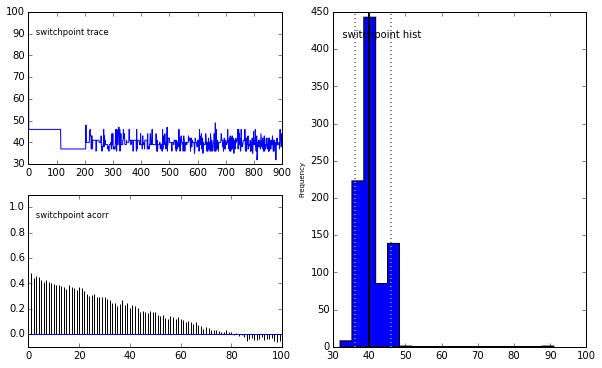

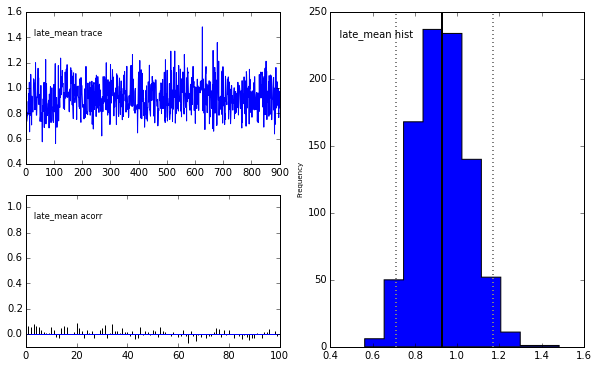

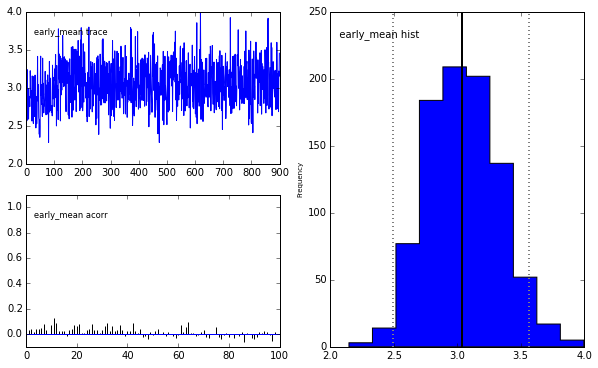

In [11]:
# generate a composite figure for the model
plot(M)